In [1]:
cd '/content/drive/My Drive/Colab Notebooks/Deep Learning/Deep Learning Assignment 5'

/content/drive/My Drive/Colab Notebooks/Deep Learning/Deep Learning Assignment 5


In [2]:
ls

'Assignment 5 Dataset.zip'           vgg16_2_ft.pth
'Deep Learning Assignmnet 5.ipynb'   vgg16_2_lr_0001_ft.pth
 resnet18_2_ft.pth                   vgg16_ft.pth
 resnet18_ft.pth                     vgg16_lr_0001_ft.pth
 resnet18_lr_0001_ft.pth


In [3]:
!unzip 'Assignment 5 Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Assignment 5 Dataset/train/normal/7ec0b033-9133-4f8c-abd0-ea246aa21dfa.png  
  inflating: Assignment 5 Dataset/train/normal/7ec4666c-0304-4b7b-8263-bf417ab7cccd.png  
  inflating: Assignment 5 Dataset/train/normal/7ee9ace4-3059-49c4-9356-705203289e46.png  
  inflating: Assignment 5 Dataset/train/normal/7ef283b8-9c5a-4ada-a575-f68289e338ae.png  
  inflating: Assignment 5 Dataset/train/normal/7ef98cac-f239-406e-af10-67aead1e038f.png  
  inflating: Assignment 5 Dataset/train/normal/7efb172c-23b7-4d57-bd57-bd461b9e7ca7.png  
  inflating: Assignment 5 Dataset/train/normal/7f015127-0907-4ba7-8021-cf868a210d4c.png  
  inflating: Assignment 5 Dataset/train/normal/7f05b70f-2ad0-4db6-9e05-6c2baec8cd52.png  
  inflating: Assignment 5 Dataset/train/normal/7f11cf49-7b97-4d39-82a1-18411a4599cd.png  
  inflating: Assignment 5 Dataset/train/normal/7f12966e-c382-4f9e-90ac-e1575dcdc812.png  
  inflating: Assignment 5 Dataset/train/normal/7f

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/Deep Learning Assignment 5/Assignment 5 Dataset'

In [6]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize(256),
                                       transforms.RandomCrop(224),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#pass transform here-in
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir + '/validation', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, num_workers=4, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, num_workers=4, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, num_workers=4, shuffle=True)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


In [7]:
print("Train Data...")
print(len(train_data))
print("Validation Data...")
print(len(valid_data))
print("Test Data...")
print(len(test_data))

Train Data...
12000
Validation Data...
1500
Test Data...
1500


# **Task1: VGG-16** 

In [0]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
print(vgg16.classifier[3])

Linear(in_features=4096, out_features=4096, bias=True)


In [0]:
for name, param in vgg16.named_parameters():
    print(name, param.requires_grad)

features.0.weight True
features.0.bias True
features.2.weight True
features.2.bias True
features.5.weight True
features.5.bias True
features.7.weight True
features.7.bias True
features.10.weight True
features.10.bias True
features.12.weight True
features.12.bias True
features.14.weight True
features.14.bias True
features.17.weight True
features.17.bias True
features.19.weight True
features.19.bias True
features.21.weight True
features.21.bias True
features.24.weight True
features.24.bias True
features.26.weight True
features.26.bias True
features.28.weight True
features.28.bias True
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [0]:
# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = False

In [0]:
for name, param in vgg16.named_parameters():
    print(name, param.requires_grad)

features.0.weight False
features.0.bias False
features.2.weight False
features.2.bias False
features.5.weight False
features.5.bias False
features.7.weight False
features.7.bias False
features.10.weight False
features.10.bias False
features.12.weight False
features.12.bias False
features.14.weight False
features.14.bias False
features.17.weight False
features.17.bias False
features.19.weight False
features.19.bias False
features.21.weight False
features.21.bias False
features.24.weight False
features.24.bias False
features.26.weight False
features.26.bias False
features.28.weight False
features.28.bias False
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [0]:
vgg16.classifier[0].out_features = 430
vgg16.classifier[3].in_features = 430
vgg16.classifier[3].out_features = len(class_names)

# Remove the Last Layer
features = list(vgg16.classifier)[0:4] # Remove last layer
vgg16.classifier = nn.Sequential(*features)

In [0]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
# # Load Model
# vgg16 = models.vgg16(pretrained=False)
# vgg16.classifier[0].out_features = 430
# vgg16.classifier[3].in_features = 430
# vgg16.classifier[3].out_features = len(class_names)

# # Remove the Last Layer
# features = list(vgg16.classifier)[0:4] # Remove last layer
# vgg16.classifier = nn.Sequential(*features)
# vgg16.load_state_dict(torch.load('vgg16_lr_0001_ft.pth'))
# # torch.save(vgg16.state_dict(), )
# print(vgg16)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
for name, param in vgg16.named_parameters():
    print(name, param.requires_grad)

features.0.weight True
features.0.bias True
features.2.weight True
features.2.bias True
features.5.weight True
features.5.bias True
features.7.weight True
features.7.bias True
features.10.weight True
features.10.bias True
features.12.weight True
features.12.bias True
features.14.weight True
features.14.bias True
features.17.weight True
features.17.bias True
features.19.weight True
features.19.bias True
features.21.weight True
features.21.bias True
features.24.weight True
features.24.bias True
features.26.weight True
features.26.bias True
features.28.weight True
features.28.bias True
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True


In [0]:
Epochs = 4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

vgg16.train()
lossEpochs = []
accEpochs = []
lossValid = []
accValid = []
for epoch in range(Epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
 
        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.data.item()))
    
    acc = 100 * correct / total
    print('Training Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossEpochs.append(running_loss)
    accEpochs.append(acc)

    # Validation Accuracy and Loss
    correct = 0
    total = 0
    valid_loss = 0.0
    confusionMatrix = np.zeros((2, 2));
    with torch.no_grad():
        for valid_data in validloader:
            images, labels = valid_data
            images, labels = images.to(device), labels.to(device)
            outputs = vgg16(images)
            valid_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print('Validation Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossValid.append(valid_loss)
    accValid.append(acc)

    torch.save(vgg16.state_dict(), 'vgg16_lr_001_ft.pth')


plt.plot(lossEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.show()

plt.plot(lossValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

print('Finished Training')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Training Accuracy of Epoch 0: 83 %
Validation Accuracy of Epoch 0: 85 %



Training Accuracy of Epoch 1: 88 %
Validation Accuracy of Epoch 1: 86 %



Training Accuracy of Epoch 2: 89 %
Validation Accuracy of Epoch 2: 87 %



Training Accuracy of Epoch 3: 89 %
Validation Accuracy of Epoch 3: 86 %



Training Accuracy of Epoch 4: 89 %
Validation Accuracy of Epoch 4: 87 %



Training Accuracy of Epoch 5: 90 %


OSError: ignored

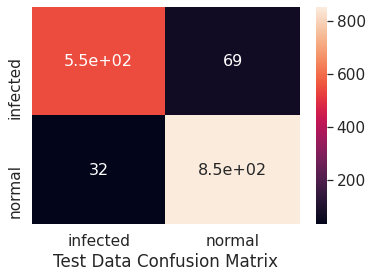

Accuracy of the network on Test Data: 93 %


In [0]:
correct = 0
total = 0
confusionMatrix = np.zeros((2, 2));
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        confusionMatrix += confusion_matrix(labels.cpu().numpy(), predicted.cpu().numpy())

acc = 100 * correct / total

df_cm = pd.DataFrame(confusionMatrix, class_names, class_names)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Test Data Confusion Matrix")
plt.show()

print('Accuracy of the network on Test Data: %d %%' % (acc))

# **Task1: ResNet-18** 

In [0]:
# Load the pretrained model from pytorch
resnet18 = models.resnet18(pretrained=True)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
print(resnet18.fc)

Linear(in_features=512, out_features=1000, bias=True)


In [0]:
output_of_cnn_layers = resnet18.fc.in_features
print(output_of_cnn_layers)

512


In [0]:
resnet18.fc = nn.Sequential(
  nn.Linear(output_of_cnn_layers, 430, bias=True),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  nn.Linear(430, len(class_names), bias=True)
)

In [0]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
for name, param in resnet18.named_parameters():
    print(name, param.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [0]:
# Freeze training for all layers
for param in resnet18.parameters():
    param.requires_grad = False 

for param in resnet18.fc.parameters():
    param.requires_grad = True

In [0]:
for name, param in resnet18.named_parameters():
    print(name, param.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2.bias False
layer2.0.downsample.0.weight False
layer2.0.downsample.1.weight False
layer2.0.downsample.1.bias False
layer2.1.conv1.weight False
layer2.1.bn1.weight False
layer2.1.bn1.bias False
layer2.1.conv2.weight False
layer2.1.bn2.weight False
layer2.1.bn2.bias False
layer3.0.conv1.weight False
layer3.0.bn1.weight False
layer3.0.bn1.bias False
layer3.0.conv2.weight False
layer3.0.bn2.weight False
layer3.0.bn2.bias False
layer3.0.downsample.0.weight False
layer3.0.downsample.1.weight Fa

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Training Accuracy of Epoch 0: 77 %
Validation Accuracy of Epoch 0: 81 %



Training Accuracy of Epoch 1: 84 %
Validation Accuracy of Epoch 1: 82 %



Training Accuracy of Epoch 2: 85 %
Validation Accuracy of Epoch 2: 83 %



Training Accuracy of Epoch 3: 86 %
Validation Accuracy of Epoch 3: 83 %



Training Accuracy of Epoch 4: 86 %
Validation Accuracy of Epoch 4: 83 %



Training Accuracy of Epoch 5: 87 %
Validation Accuracy of Epoch 5: 84 %



Training Accuracy of Epoch 6: 87 %
Validation Accuracy of Epoch 6: 83 %



Training Accuracy of Epoch 7: 86 %
Validation Accuracy of Epoch 7: 84 %



Training Accuracy of Epoch 8: 87 %
Validation Accuracy of Epoch 8: 84 %



Training Accuracy of Epoch 9: 87 %
Validation Accuracy of Epoch 9: 83 %


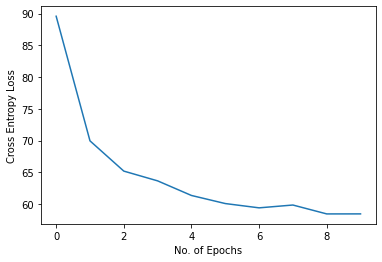

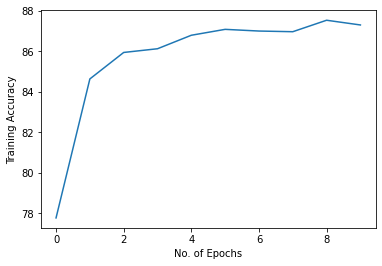

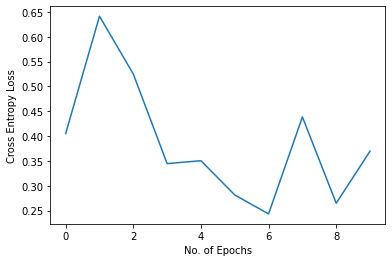

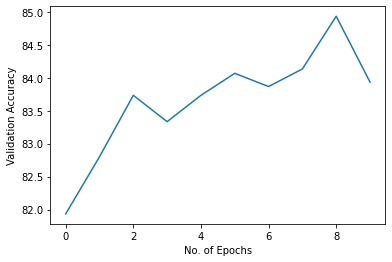

Finished Training


In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

resnet18.train()
lossEpochs = []
accEpochs = []
lossValid = []
accValid = []
for epoch in range(Epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = resnet18(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
 
        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.data.item()))
    
    acc = 100 * correct / total
    print('Training Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossEpochs.append(running_loss)
    accEpochs.append(acc)

    # Validation Accuracy and Loss
    correct = 0
    total = 0
    valid_loss = 0.0
    confusionMatrix = np.zeros((2, 2));
    with torch.no_grad():
        for valid_data in validloader:
            images, labels = valid_data
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            valid_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print('Validation Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossValid.append(valid_loss)
    accValid.append(acc)

    torch.save(resnet18.state_dict(), 'resnet18_lr_0001_ft.pth')

plt.plot(lossEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.show()

plt.plot(lossValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

print('Finished Training')


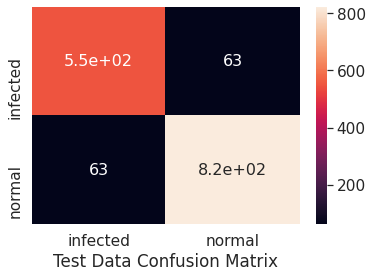

F1 Score of the network on Test Data: 0.925547612343025
Accuracy of the network on Test Data: 91 %


In [0]:
from sklearn.metrics import f1_score
correct = 0
total = 0
F1 = 0.0
num_batches = 0
confusionMatrix = np.zeros((2, 2));
with torch.no_grad():
    for data in testloader:
        num_batches += 1
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        confusionMatrix += confusion_matrix(labels.cpu().numpy(), predicted.cpu().numpy())
        F1 += f1_score(labels.cpu().numpy(), predicted.cpu().numpy())

acc = 100 * correct / total
F1 = F1/num_batches
df_cm = pd.DataFrame(confusionMatrix, class_names, class_names)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Test Data Confusion Matrix")
plt.show()

print('F1 Score of the network on Test Data: ' + str(F1))
print('Accuracy of the network on Test Data: %d %%' % (acc))

# **Task2: VGG-16**

In [0]:
# Load the pretrained model from pytorch
vgg16_2 = models.vgg16(pretrained=True)
print(vgg16_2)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [0]:
for name, param in vgg16_2.named_parameters():
    print(name, param.requires_grad)

features.0.weight True
features.0.bias True
features.2.weight True
features.2.bias True
features.5.weight True
features.5.bias True
features.7.weight True
features.7.bias True
features.10.weight True
features.10.bias True
features.12.weight True
features.12.bias True
features.14.weight True
features.14.bias True
features.17.weight True
features.17.bias True
features.19.weight True
features.19.bias True
features.21.weight True
features.21.bias True
features.24.weight True
features.24.bias True
features.26.weight True
features.26.bias True
features.28.weight True
features.28.bias True
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [0]:
# # Freeze training for all layers
# for param in vgg16_2.features.parameters():
#     param.requires_grad = False

# # Unfreeze the Last CNN Layer
# for param in vgg16_2.features[28].parameters():
#     param.requires_grad = True

In [0]:
for name, param in vgg16_2.named_parameters():
    print(name, param.requires_grad)


features.0.weight True
features.0.bias True
features.2.weight True
features.2.bias True
features.5.weight True
features.5.bias True
features.7.weight True
features.7.bias True
features.10.weight True
features.10.bias True
features.12.weight True
features.12.bias True
features.14.weight True
features.14.bias True
features.17.weight True
features.17.bias True
features.19.weight True
features.19.bias True
features.21.weight True
features.21.bias True
features.24.weight True
features.24.bias True
features.26.weight True
features.26.bias True
features.28.weight True
features.28.bias True
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [0]:
vgg16_2.classifier[0].out_features = 430
vgg16_2.classifier[3].in_features = 430
vgg16_2.classifier[3].out_features = len(class_names)

# Remove the Last Layer
features = list(vgg16_2.classifier)[0:4] # Remove last layer
vgg16_2.classifier = nn.Sequential(*features)


In [0]:
print(vgg16_2)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16_2.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Training Accuracy of Epoch 0: 85 %
Validation Accuracy of Epoch 0: 88 %



Training Accuracy of Epoch 1: 92 %
Validation Accuracy of Epoch 1: 89 %



Training Accuracy of Epoch 2: 92 %
Validation Accuracy of Epoch 2: 90 %



Training Accuracy of Epoch 3: 93 %
Validation Accuracy of Epoch 3: 90 %



Training Accuracy of Epoch 4: 94 %
Validation Accuracy of Epoch 4: 91 %



Training Accuracy of Epoch 5: 94 %
Validation Accuracy of Epoch 5: 90 %



Training Accuracy of Epoch 6: 94 %
Validation Accuracy of Epoch 6: 91 %



Training Accuracy of Epoch 7: 94 %
Validation Accuracy of Epoch 7: 91 %



Training Accuracy of Epoch 8: 94 %
Validation Accuracy of Epoch 8: 91 %



Training Accuracy of Epoch 9: 94 %
Validation Accuracy of Epoch 9: 92 %


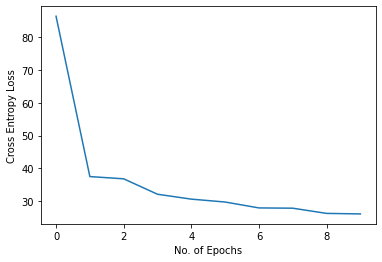

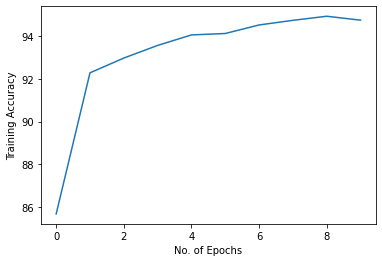

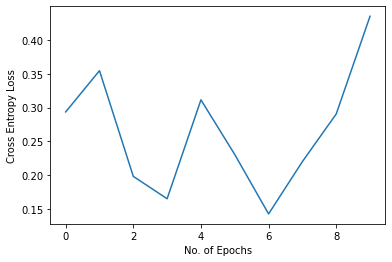

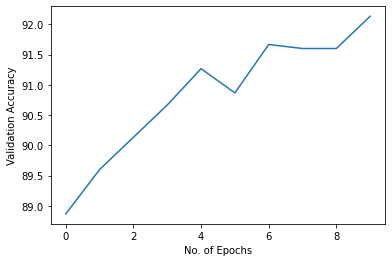

Finished Training


In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16_2.to(device)

vgg16_2.train()
lossEpochs = []
accEpochs = []
lossValid = []
accValid = []
for epoch in range(Epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16_2(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
 
        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.data.item()))
    
    acc = 100 * correct / total
    print('Training Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossEpochs.append(running_loss)
    accEpochs.append(acc)

    # Validation Accuracy and Loss
    correct = 0
    total = 0
    valid_loss = 0.0
    confusionMatrix = np.zeros((2, 2));
    with torch.no_grad():
        for valid_data in validloader:
            images, labels = valid_data
            images, labels = images.to(device), labels.to(device)
            outputs = vgg16_2(images)
            valid_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print('Validation Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossValid.append(valid_loss)
    accValid.append(acc)

    torch.save(vgg16_2.state_dict(), 'vgg16_2_lr_0001_ft.pth')

plt.plot(lossEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.show()

plt.plot(lossValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

print('Finished Training')


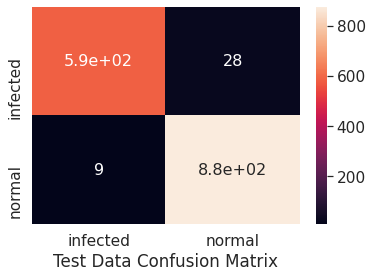

F1 Score of the network on Test Data: 0.9791562038895156
Accuracy of the network on Test Data: 97 %


In [0]:
from sklearn.metrics import f1_score
correct = 0
total = 0
F1 = 0.0
num_batches = 0
confusionMatrix = np.zeros((2, 2));
with torch.no_grad():
    for data in testloader:
        num_batches += 1
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        confusionMatrix += confusion_matrix(labels.cpu().numpy(), predicted.cpu().numpy())
        F1 += f1_score(labels.cpu().numpy(), predicted.cpu().numpy())

acc = 100 * correct / total
F1 = F1/num_batches
df_cm = pd.DataFrame(confusionMatrix, class_names, class_names)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Test Data Confusion Matrix")
plt.show()

print('F1 Score of the network on Test Data: ' + str(F1))
print('Accuracy of the network on Test Data: %d %%' % (acc))

# **Task2: ResNet-18**

In [8]:
# Load the pretrained model from pytorch
resnet18_2 = models.resnet18(pretrained=True)
print(resnet18_2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [9]:
output_of_cnn_layers = resnet18_2.fc.in_features
print(output_of_cnn_layers)

512


In [0]:
resnet18_2.fc = nn.Sequential(
  nn.Linear(output_of_cnn_layers, 430, bias=True),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  nn.Linear(430, len(class_names), bias=True)
)

In [12]:
print(resnet18_2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
for name, param in resnet18_2.named_parameters():
    print(name, param.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [0]:
# # Freeze training for all layers
# for param in resnet18_2.parameters():
#     param.requires_grad = False 

# # Unfreeze the FC Layers
# for param in resnet18_2.fc.parameters():
#     param.requires_grad = True

# # # Unfreeze the last CNN Layer
# # i = 0
# # for child in resnet18_2.children():
# #   i += 1
# #   if i > 6:
# #     for param in child.parameters():
# #       param.requires_grad = True
  

# # Unfreeze the Last CNN Layer
# for param in resnet18_2.layer4.parameters():
#     param.requires_grad = True

In [15]:
for name, param in resnet18_2.named_parameters():
    print(name, param.requires_grad)


conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18_2.parameters(), lr=0.001, momentum=0.9)


In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18_2.to(device)

resnet18_2.train()
lossEpochs = []
accEpochs = []
lossValid = []
accValid = []
for epoch in range(Epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = resnet18_2(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
 
        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.data.item()))
    
    acc = 100 * correct / total
    print('Training Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossEpochs.append(running_loss)
    accEpochs.append(acc)

    # Validation Accuracy and Loss
    correct = 0
    total = 0
    valid_loss = 0.0
    confusionMatrix = np.zeros((2, 2));
    with torch.no_grad():
        for valid_data in validloader:
            images, labels = valid_data
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18_2(images)
            valid_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print('Validation Accuracy of Epoch ' + str(epoch) + ': %d %%' % (acc))
    lossValid.append(valid_loss)
    accValid.append(acc)

    torch.save(resnet18_2.state_dict(), 'resnet18_2_lr_0001_ft.pth')

plt.plot(lossEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accEpochs)
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.show()

plt.plot(lossValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

plt.plot(accValid)
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

print('Finished Training')



Training Accuracy of Epoch 0: 91 %
Validation Accuracy of Epoch 0: 87 %



Training Accuracy of Epoch 1: 92 %
Validation Accuracy of Epoch 1: 90 %



Training Accuracy of Epoch 2: 92 %
Validation Accuracy of Epoch 2: 90 %


In [0]:
from sklearn.metrics import f1_score
correct = 0
total = 0
F1 = 0.0
num_batches = 0
confusionMatrix = np.zeros((2, 2));
with torch.no_grad():
    for data in testloader:
        num_batches += 1
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        confusionMatrix += confusion_matrix(labels.cpu().numpy(), predicted.cpu().numpy())
        F1 += f1_score(labels.cpu().numpy(), predicted.cpu().numpy())

acc = 100 * correct / total
F1 = F1/num_batches
df_cm = pd.DataFrame(confusionMatrix, class_names, class_names)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Test Data Confusion Matrix")
plt.show()

print('F1 Score of the network on Test Data: ' + str(F1))
print('Accuracy of the network on Test Data: %d %%' % (acc))

Accuracy of the network on Validation Data: 89 %
